<a href="https://colab.research.google.com/github/jieun1102/dprproject/blob/main/dprproject_0527.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'dprproject'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (469/469), done.
remote: Compressing objects: 100% (463/463), done.
remote: Total 469 (delta 70), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (469/469), 162.19 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (70/70), done.
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



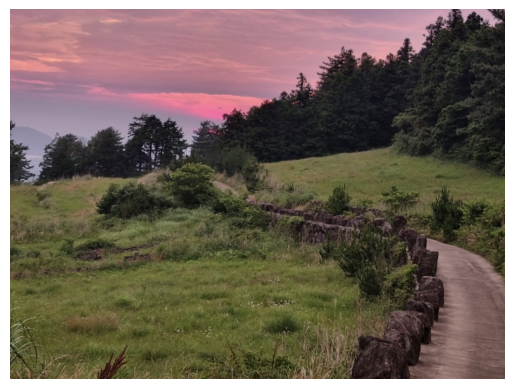

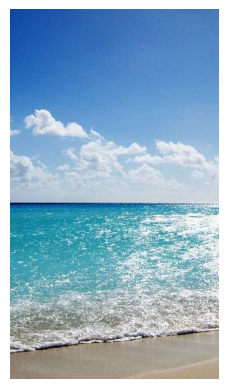

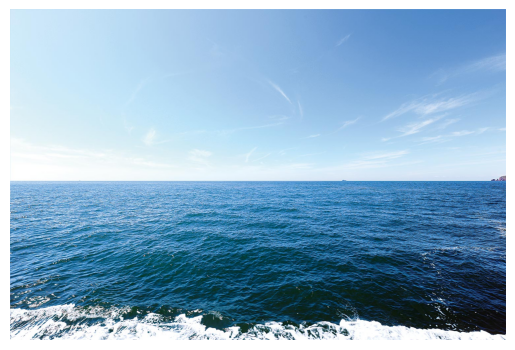

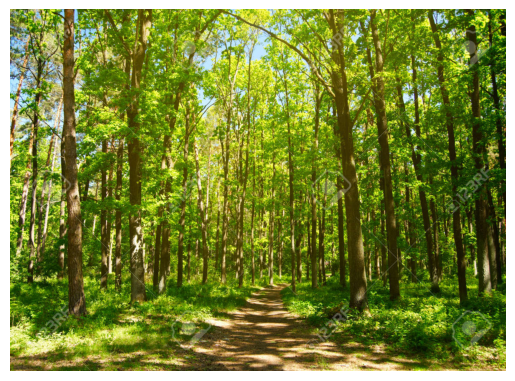

Epoch 1/10
6/6 [==============================] - 6s 825ms/step - loss: 1.4012 - accuracy: 0.5676 - val_loss: 0.3613 - val_accuracy: 0.8085
Epoch 2/10
6/6 [==============================] - 5s 909ms/step - loss: 0.2066 - accuracy: 0.9189 - val_loss: 0.1070 - val_accuracy: 0.9574
Epoch 3/10
6/6 [==============================] - 5s 859ms/step - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.0614 - val_accuracy: 0.9787
Epoch 4/10
6/6 [==============================] - 4s 729ms/step - loss: 0.0630 - accuracy: 0.9676 - val_loss: 0.0951 - val_accuracy: 0.9574
Epoch 5/10
6/6 [==============================] - 6s 1s/step - loss: 0.0465 - accuracy: 0.9892 - val_loss: 0.1101 - val_accuracy: 0.9574
Epoch 6/10
6/6 [==============================] - 5s 753ms/step - loss: 0.0462 - accuracy: 0.9838 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 4s 744ms/step - loss: 0.0707 - accuracy: 0.9784 - val_loss: 0.1630 - val_accuracy: 0.9574
Epoch 8/10
6/6 [=======

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image

# GitHub에서 데이터 다운로드
!git clone https://github.com/jieun1102/dprproject.git
data_dir = './dprproject/data/'
test_dir = './dprproject/data/test/'

# 이미지와 레이블 불러오기
def load_data(data_dir):
    categories = ['sea', 'forest']
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img_array, (128, 128))
                data.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(labels)

images, labels = load_data(data_dir)
labels = to_categorical(labels, num_classes=2)

# 이미지 데이터 정규화
images = images / 255.0

# 학습 데이터와 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# forest 폴더 안에 있는 이미지 중 하나를 화면에 출력
image_path = os.path.join(data_dir, 'forest')
filename = os.listdir(image_path)[0]
image_file = os.path.join(image_path, filename)
image = cv2.imread(image_file)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# test 폴더 안에 있는 이미지 중 하나를 화면에 출력
test_image_path = test_dir  # test 이미지 폴더 경로

# 테스트 이미지 폴더 안에 있는 모든 이미지 파일 출력
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_file = os.path.join(test_dir, filename)  # 이미지 파일 경로 생성
        image = cv2.imread(image_file)  # 이미지 파일 읽기
        if image is not None:  # 이미지가 제대로 읽혔는지 확인
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # 이미지 출력
            plt.axis('off')  # 축 제거
            plt.show()

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 테스트 이미지 불러오기 및 전처리
test_images = []
test_image_paths = []  # 테스트 이미지 파일 경로를 저장할 리스트
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(test_dir, filename))
        img = img.resize((128, 128))  # 모델의 입력 크기와 일치하도록 크기 조정
        img_array = np.array(img) / 255.0  # 이미지 데이터를 정규화
        test_images.append(img_array)
        test_image_paths.append(os.path.join(test_dir, filename))  # 파일 경로 저장

# 테스트 이미지 파일 목록 출력
print("테스트 이미지 파일 목록:")
for path in test_image_paths:
    print(path)

# 예측 수행 및 결과 출력
for i, img_array in enumerate(test_images):
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    prediction = model.predict(img_array)
    if prediction[0][0] > prediction[0][1]:
        print(f"이미지 {i+1}: 해당 이미지는 바다입니다.")
    else:
        print(f"이미지 {i+1}: 해당 이미지는 숲입니다.")


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# GitHub에서 데이터 다운로드
!git clone https://github.com/jieun1102/dprproject.git
data_dir = './dprproject/data/'
test_dir = './dprproject/data/test/'

# 이미지와 레이블 불러오기
def load_data(data_dir):
    categories = ['sea', 'forest']
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img_array, (128, 128))
                data.append(resized_img)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(data), np.array(labels)

images, labels = load_data(data_dir)
labels = to_categorical(labels, num_classes=2)

# 이미지 데이터 정규화
images = images / 255.0

# 데이터 증강을 위한 ImageDataGenerator 생성
datagen = ImageDataGenerator(
    rotation_range=20,  # 랜덤하게 이미지를 최대 20도 회전
    width_shift_range=0.1,  # 랜덤하게 이미지를 가로로 최대 10% 이동
    height_shift_range=0.1,  # 랜덤하게 이미지를 세로로 최대 10% 이동
    horizontal_flip=True,  # 랜덤하게 이미지를 수평으로 뒤집기
    vertical_flip=False,  # 수직 뒤집기는 사용하지 않음
    zoom_range=0.1  # 랜덤하게 이미지를 최대 10% 확대/축소
)

# 학습 및 테스트 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 증강 적용하여 모델 학습
datagen.fit(x_train)
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32, epochs=10, validation_data=(x_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 테스트 이미지 예측 및 결과 출력
for filename in os.listdir(test_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img = Image.open(os.path.join(test_dir, filename))
        img = img.resize((128, 128))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        if prediction[0][0] > prediction[0][1]:
            print(f"이미지 {filename}: 해당 이미지는 바다입니다.")
        else:
            print(f"이미지 {filename}: 해당 이미지는 숲입니다.")


fatal: destination path 'dprproject' already exists and is not an empty directory.
OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Epoch 1/10
7/7 [==============================] - 8s 983ms/step - loss: 0.8384 - accuracy: 0.7112 - val_loss: 0.1119 - val_accuracy: 0.9828
Epoch 2/10
7/7 [==============================] - 6s 840ms/step - loss: 0.1198 - accuracy: 0.9526 - val_loss: 0.0212 - val_accuracy: 0.9828
Epoch 3/10
7/7 [==============================] - 6s 860ms/step - loss: 0.1433 - accuracy: 0.9569 - val_loss: 0.2119 - val_accuracy: 0.9310
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.1010 - accuracy: 0.9569 - val_loss: 0.0468 - val_accuracy: 0.9828
Epoch 5/10
7/7 [==============================] - 6s 842ms/step - loss: 0.0728 - accuracy: 0.9655 - 